In [1]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = ""
os.environ["JAX_PLATFORMS"] = "cpu"
os.environ["JAX_ENABLE_X64"] = "True"


In [2]:
import jax
from jax import random
import jax.numpy as jnp

from bpd.sample import get_target_images
from bpd.draw import draw_gaussian_galsim
from bpd.utils import get_snr

import matplotlib.pyplot as plt

In [3]:
background = 1.0

In [4]:
# image size
import galsim 
def get_gaussian_size(f, hlr, e1, e2, psf_hlr):

    gal = galsim.Gaussian(flux=f, half_light_radius=hlr)
    gal = gal.shear(g1=e1, g2=e2)  # intrinsic ellipticity

    psf = galsim.Gaussian(flux=1.0, half_light_radius=psf_hlr)
    gal_conv = galsim.Convolve([gal, psf])
    return gal_conv.getGoodImageSize(0.2)


In [5]:
get_gaussian_size(1e6, 0.8, e1=0.1, e2=0.1, psf_hlr=0.7)

58

In [6]:
k = random.key(42)

In [7]:

fluxes = 10**jnp.linspace(1., 6., 1000)

In [8]:
snrs = [] 
for f in fluxes: 
    im = draw_gaussian_galsim(f = f, hlr=0.8, e1=0, e2=0, g1=0, g2=0, x=0,y=0, slen=63)
    snr = get_snr(im, 1.0)
    snrs.append(snr)
snrs = jnp.array(snrs)

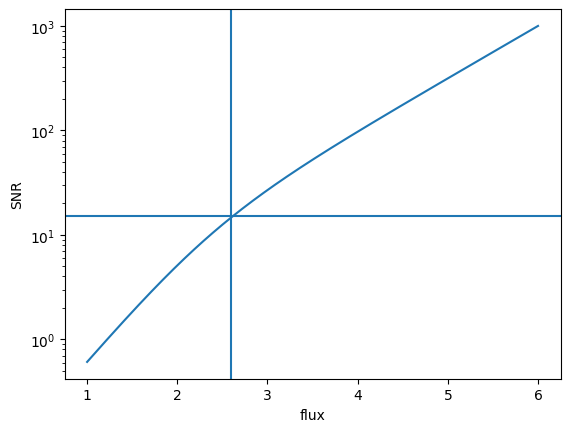

In [9]:
plt.plot(jnp.log10(fluxes),snrs)
plt.yscale('log')
plt.xlabel("flux")
plt.ylabel("SNR")

plt.axvline(2.6)
plt.axhline(15)


In [10]:
#lognormal distribution of fluxes
k = random.key(42)
fs = 0.4 * random.normal(k, 10000) + 2.6


(array([3.000e+00, 3.000e+00, 8.000e+00, 2.800e+01, 6.100e+01, 1.070e+02,
        1.840e+02, 3.810e+02, 5.810e+02, 6.900e+02, 9.970e+02, 1.152e+03,
        1.229e+03, 1.155e+03, 9.930e+02, 8.140e+02, 6.340e+02, 4.630e+02,
        2.510e+02, 1.510e+02, 6.700e+01, 2.700e+01, 1.600e+01, 4.000e+00,
        1.000e+00]),
 array([1.06479998, 1.18599368, 1.30718737, 1.42838106, 1.54957476,
        1.67076845, 1.79196214, 1.91315584, 2.03434953, 2.15554322,
        2.27673692, 2.39793061, 2.5191243 , 2.64031799, 2.76151169,
        2.88270538, 3.00389907, 3.12509277, 3.24628646, 3.36748015,
        3.48867385, 3.60986754, 3.73106123, 3.85225493, 3.97344862,
        4.09464231]),
 [<matplotlib.patches.Polygon at 0x7f53883fe2a0>])

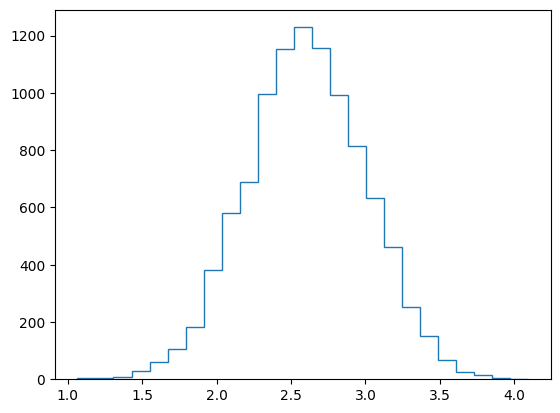

In [11]:
plt.hist(fs, bins=25, histtype='step')


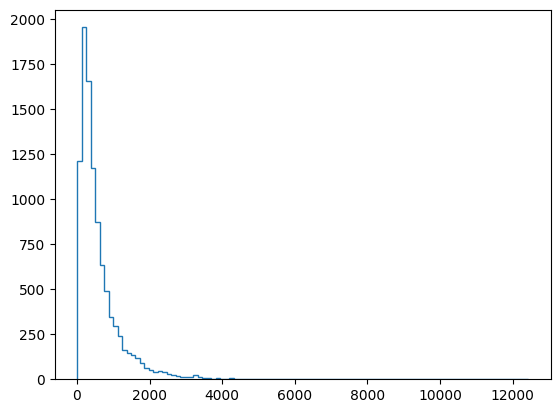

In [14]:
plt.hist(10**fs, bins=101, histtype='step');

In [77]:
# fs = random.lognormal(k, sigma=0.5, shape=(10000))

In [98]:
# plt.hist(fs, bins=25, histtype='step')
# plt.yscale('log')
# plt.axvline(0.0, color='b', linestyle='--')
# plt.axvline(fs.mean(), color='k', linestyle='--')
# plt.axvline(2.5, color='r', linestyle='--')

In [54]:
fs

Array([  77.85545602, 1067.3855166 , 1564.79434172,  109.39893403,
         54.7075759 ,  227.04950825, 1789.43489288, 1675.10698658,
        167.88950212,  639.31026778,  209.04542095,  142.36579387,
        330.43948787,  153.30418754, 1133.24765896,  353.75367222,
        448.73215543,  436.07717841,  627.10156227,  398.35439775,
         98.43225051,  935.28818394,  246.66084052,  587.57929801,
        708.08150168, 1151.54951839, 6298.63758511,  585.74081994,
        353.118449  ,  115.89343089,  322.22333435,  170.14691197,
        132.24804737,  330.24683989, 1428.83267194, 5952.85667217,
       6458.61327041,   71.67024186,  542.68136072,  139.54672778,
         18.60545529,  446.44834172,  456.62316867,  220.45754876,
        155.69123152, 1614.90019187, 8221.44911265,  558.4143641 ,
        442.67357096,  137.10787853,  197.48828483,  723.37633799,
       1705.92415629, 1441.93504843,    9.17925013,   52.94458856,
        234.28370876,  359.36820312,  635.93742461, 1213.33253